In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("patient_data.csv")

In [3]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [4]:
df = df.rename(columns={"C":"Gender"})

In [5]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [7]:
df.shape

(1825, 14)

In [8]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,6
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


In [9]:
df.isnull().sum()

Gender             0
Age                0
History            0
Patient            0
TakeMedication     0
Severity           0
BreathShortness    0
VisualChanges      0
NoseBleeding       0
Whendiagnoused     0
Systolic           0
Diastolic          0
ControlledDiet     0
Stages             0
dtype: int64

In [10]:
df.head()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df['Gender'].value_counts()

Gender
Female    913
Male      912
Name: count, dtype: int64

In [13]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'HYPERTENSION (Stage-2).',
       'HYPERTENSIVE CRISI', 'NORMAL'], dtype=object)

In [14]:
df['Stages'] = df['Stages'].replace({'HYPERTENSION (Stage-2).': 'HYPERTENSION (Stage-2)',
                                     'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'})


In [15]:
df.head(2)

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [16]:
label_encode = LabelEncoder()
columns = ['Gender','History','Patient','TakeMedication','Severity','BreathShortness','VisualChanges','NoseBleeding',
           'ControlledDiet','Stages']
for col in columns:
    df[col] = label_encode.fit_transform(df[col])

In [17]:
df['Stages'].unique()

array([0, 1, 2, 3])

In [18]:
df['Gender'].unique()

array([1, 0])

In [19]:
# Use raw strings (r'...') to avoid warnings
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+\.?\d*)')
df['Systolic'] = df['Systolic'].astype(str).str.extract(r'(\d+\.?\d*)')
df['Diastolic'] = df['Diastolic'].astype(str).str.extract(r'(\d+\.?\d*)')


In [20]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

df_clean = df[['Age', 'Systolic', 'Diastolic']].dropna()

In [21]:
print(df[['Age','Systolic','Diastolic']].dtypes)


Age          int64
Systolic     int64
Diastolic    int64
dtype: object


In [22]:
df['Systolic'].unique()

array([111, 121, 130, 100])

In [23]:
df['Diastolic'].unique()

array([ 81,  91, 100, 130,  70])

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Example: Load your data
# df = pd.read_csv('patient.csv')

# STEP 1: Make sure columns are numeric
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

# STEP 2: Apply StandardScaler
scaler = StandardScaler()
df[['Systolic', 'Diastolic']] = scaler.fit_transform(df[['Systolic', 'Diastolic']])

# STEP 3: Check result
print(df[['Systolic', 'Diastolic']].head())


   Systolic  Diastolic
0 -0.813748  -0.366384
1 -0.813748  -0.366384
2 -0.813748  -0.366384
3 -0.813748  -0.366384
4 -0.813748  -0.366384


In [25]:
experience_mapping = {
    '<1 Year': 0,
    '1 - 5 Years': 3,
    '>5 Years': 6
}
df['Whendiagnoused'] = df['Whendiagnoused'].map(experience_mapping)

# Check result
print(df['Whendiagnoused'].unique())

[0 3 6]


# Exploratory Data Analysis

In [26]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825.000000,1825.00000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1.825000e+03,1.825000e+03,1825.000000,1825.000000
mean,0.499726,41.35726,0.907945,0.460822,0.921096,1.013151,0.465205,0.484932,1.026849,2.998356,-4.360591e-16,5.606474e-16,0.460822,1.145205
std,0.500137,17.31147,0.289183,0.498599,0.854759,0.786287,0.498925,0.499910,0.678493,2.482504,1.000274e+00,1.000274e+00,0.498599,1.096876
min,0.000000,18.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.413746e+00,-1.515089e+00,0.000000,0.000000
25%,0.000000,18.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-8.137476e-01,-3.663840e-01,0.000000,0.000000
50%,0.000000,35.00000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.000000,-8.137476e-01,-3.663840e-01,0.000000,1.000000
75%,1.000000,51.00000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,6.000000,6.407963e-01,6.778933e-01,1.000000,2.000000
max,1.000000,65.00000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,6.000000,1.949886e+00,4.750575e+00,1.000000,3.000000


In [27]:
gender_counts = df['Gender'].value_counts()

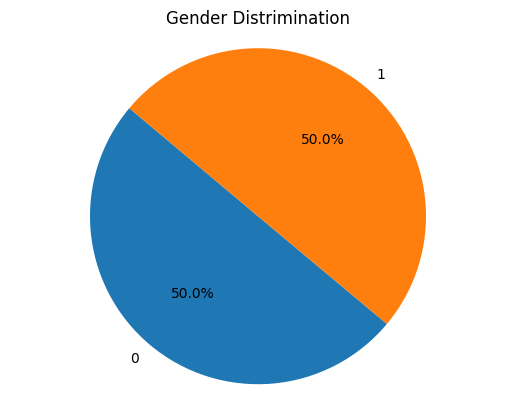

In [28]:
plt.pie(gender_counts, labels = gender_counts.index, autopct= '%1.1f%%', startangle=140)
plt.title("Gender Distrimination")
plt.axis('equal')
plt.show()

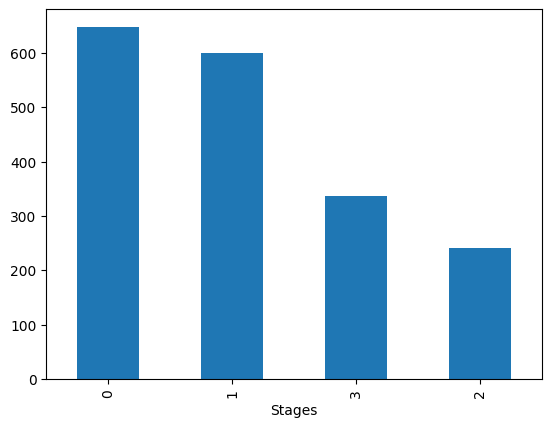

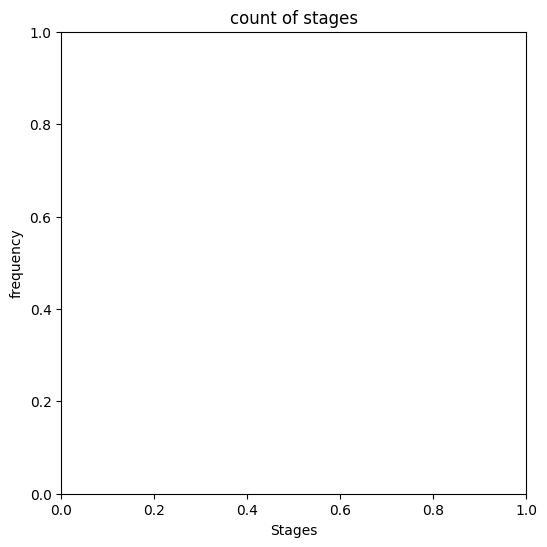

In [29]:
frequency = df['Stages'].value_counts()
frequency.plot(kind='bar')
plt.figure(figsize=(6,6))
plt.xlabel('Stages')
plt.ylabel('frequency')
plt.title('count of stages')
plt.show()

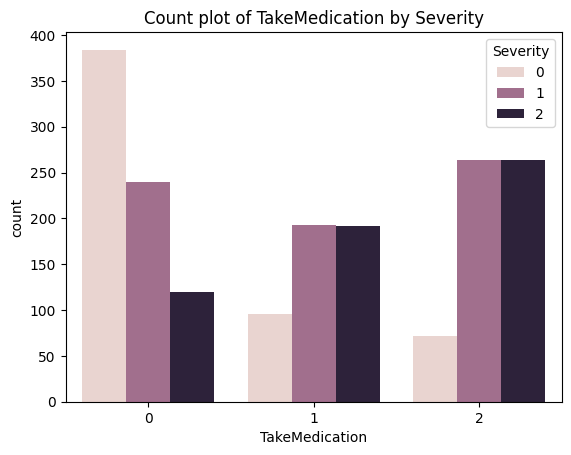

In [30]:
sns.countplot(x = 'TakeMedication', hue = 'Severity',data = df)
plt.title("Count plot of TakeMedication by Severity")
plt.show()

In [31]:
print(df[['Age','Systolic','Diastolic']].dtypes)


Age            int64
Systolic     float64
Diastolic    float64
dtype: object


In [32]:
%matplotlib inline


In [33]:
print(df[['Age','Systolic','Diastolic']].head())
print(df[['Age','Systolic','Diastolic']].describe())
print(df[['Age','Systolic','Diastolic']].isnull().sum())

   Age  Systolic  Diastolic
0   18 -0.813748  -0.366384
1   18 -0.813748  -0.366384
2   35 -0.813748  -0.366384
3   35 -0.813748  -0.366384
4   51 -0.813748  -0.366384
              Age      Systolic     Diastolic
count  1825.00000  1.825000e+03  1.825000e+03
mean     41.35726 -4.360591e-16  5.606474e-16
std      17.31147  1.000274e+00  1.000274e+00
min      18.00000 -2.413746e+00 -1.515089e+00
25%      18.00000 -8.137476e-01 -3.663840e-01
50%      35.00000 -8.137476e-01 -3.663840e-01
75%      51.00000  6.407963e-01  6.778933e-01
max      65.00000  1.949886e+00  4.750575e+00
Age          0
Systolic     0
Diastolic    0
dtype: int64


In [34]:
# Use raw strings (r'...') to avoid warnings
df['Age'] = df['Age'].astype(str).str.extract(r'(\d+\.?\d*)')
df['Systolic'] = df['Systolic'].astype(str).str.extract(r'(\d+\.?\d*)')
df['Diastolic'] = df['Diastolic'].astype(str).str.extract(r'(\d+\.?\d*)')


In [35]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Systolic'] = pd.to_numeric(df['Systolic'], errors='coerce')
df['Diastolic'] = pd.to_numeric(df['Diastolic'], errors='coerce')

df_clean = df[['Age', 'Systolic', 'Diastolic']].dropna()

In [36]:
print(df[['Age','Systolic','Diastolic']].dtypes)


Age            int64
Systolic     float64
Diastolic    float64
dtype: object


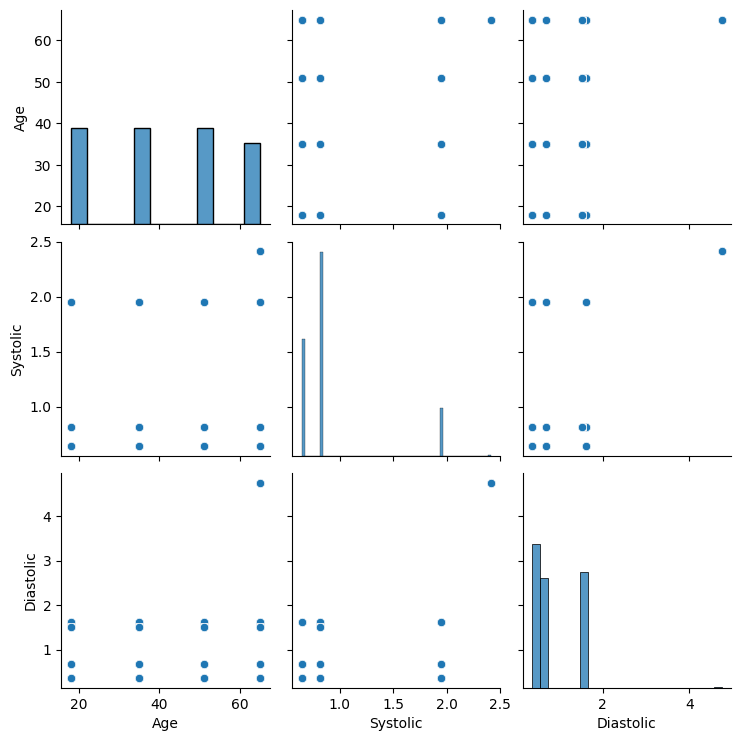

In [37]:
sns.pairplot(df_clean)
plt.show()

In [38]:
X = df.drop('Stages',axis = 1)
X

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,18,1,0,0,0,0,0,1,0,0.813748,0.366384,0
1,0,18,1,0,0,0,0,0,1,0,0.813748,0.366384,0
2,1,35,1,0,0,0,0,0,1,0,0.813748,0.366384,0
3,0,35,1,0,0,0,0,0,1,0,0.813748,0.366384,0
4,1,51,1,0,0,0,0,0,1,0,0.813748,0.366384,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,35,1,0,0,2,0,0,1,6,0.813748,1.515089,0
1821,1,51,1,0,0,2,0,0,1,6,0.813748,1.515089,0
1822,0,51,1,0,0,2,0,0,1,6,0.813748,1.515089,0
1823,1,65,1,0,0,2,0,0,1,6,0.813748,1.515089,0


In [39]:
Y = df['Stages']
Y

0       0
1       0
2       0
3       0
4       0
       ..
1820    3
1821    3
1822    3
1823    3
1824    3
Name: Stages, Length: 1825, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=30)

In [41]:
x_train

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
1208,0,65,1,1,2,2,1,1,2,3,0.640796,0.677893,1
1257,0,51,1,0,1,0,0,0,1,6,0.640796,0.366384,0
74,1,35,1,0,0,2,1,0,1,0,0.813748,0.366384,0
109,1,51,1,1,1,1,1,1,2,3,1.949886,0.677893,1
1396,1,35,1,1,2,1,1,1,2,6,0.640796,0.677893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,0,18,1,1,2,2,1,1,0,6,0.640796,0.677893,1
1164,1,35,1,1,2,2,1,1,2,3,0.640796,0.366384,1
500,1,65,1,1,1,2,1,1,2,6,1.949886,0.366384,1
941,0,18,1,0,0,0,0,0,1,3,0.813748,0.677893,0


## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression = LogisticRegression(max_iter=1000, solver='lbfgs')
logistic_regression.fit(x_train, y_train)


y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
c_lr = classification_report(y_test, y_pred)

print('Accuracy Score:', acc_lr)
print(c_lr)


Accuracy Score: 0.9671232876712329
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       0.85      1.00      0.92        66

    accuracy                           0.97       365
   macro avg       0.96      0.98      0.97       365
weighted avg       0.97      0.97      0.97       365



## Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_rf)
print(c_rf)


Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



## Decision Tree

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
c_rf = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_rf)
print(c_rf)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



## Gaussian Navies Bayes

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

NB = GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test, y_pred)
c_nb = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_nb)
print(c_nb)

Accuracy Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       1.00      1.00      1.00       133
           2       1.00      1.00      1.00        34
           3       1.00      1.00      1.00        66

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



## Multinomial Navies Bayes

In [46]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

mNB = MultinomialNB()
mNB.fit(x_train, y_train)
y_pred = mNB.predict(x_test)  # Corrected from NB.predict(x_test) to mNB.predict(x_test)

acc_mnb = accuracy_score(y_test, y_pred)
c_mnb = classification_report(y_test, y_pred)

print('Accuracy Score: ', acc_mnb)
print(c_mnb)

Accuracy Score:  0.9041095890410958
              precision    recall  f1-score   support

           0       0.99      0.80      0.88       132
           1       0.90      0.99      0.95       133
           2       0.88      0.82      0.85        34
           3       0.80      0.98      0.88        66

    accuracy                           0.90       365
   macro avg       0.89      0.90      0.89       365
weighted avg       0.91      0.90      0.90       365



In [47]:
feature_names = x_train.columns
input_values = [[0, 3, 0, 2, 0, 0, 1, 6, 0.0, 0.0, 0, 0, 0]]
input_df = pd.DataFrame(input_values, columns=feature_names)

prediction = random_forest.predict(input_df)
print("Prediction:", prediction[0])

Prediction: 0


## Model

In [48]:
model = pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','Decision Tree','Gaussian Navies Bayes','Multinomial Navies Bayes'],
                      'Score':[acc_lr,acc_rf,acc_rf,acc_nb,acc_mnb],})

In [49]:
model

,Model,Score
0,Linear Regression,0.967123
1,Random Forest Regressor,1.000000
2,Decision Tree,1.000000
3,Gaussian Navies Bayes,1.000000
4,Multinomial Navies Bayes,0.904110


In [50]:
import pickle
import warnings
# pickle.dump(random_forest,open("model.pkl","wb"))
with open('model.pkl', 'wb') as f:
    pickle.dump(random_forest, f)